### Imports

Using `PyPlot` to plot data

In [1]:
using PyPlot

# Test Implementation of the 6-point Peskin Kernel

## Load Data

This data is populated by the `test_kernel_6p` program.
1. `make`
2. `./test_kernel_6p > test_data.6p`

In [2]:
f = open("test_data.txt")
a = readlines(f)
close(f)

## Parse Data

Simple data structure to hold $(x,f(x))$ tuples

In [3]:
struct TestData
    dx::Float64
     x::Array{Float64}
    fx::Array{Float64}
end

Parse the `test_data.txt` file:

In [4]:
function parse_test(file_lines)
    # file format:
    #  1:      HEADER
    #  2:      dx= <dx>
    #  3..n+2: <x> <f(x)> 
    
    # extract dx from the second line
    # note the suse of `SubString` <= split returns views, casting to `String` might envoke a copy
    line::Array{SubString{String}} = split(file_lines[2], "=")
    dx::Float64                    = parse(Float64, line[2])
    
    # initialize arrays holding data
    n_lines::Int       = length(file_lines)
    x::Array{Float64}  = Array{Float64}(undef, n_lines - 2)
    fx::Array{Float64} = Array{Float64}(undef, n_lines - 2)

    # iterate over the rest of the lines, parsing the (x, f(x)) tuples
    for i = 3:n_lines
        line    = split(file_lines[i])
         x[i-2] = parse(Float64, line[1])
        fx[i-2] = parse(Float64, line[2])
    end
    
    test_data = TestData(dx, x, fx)
end

parse_test (generic function with 1 method)

## Compare `test_data.txt` to Theory

The 6-point kernel function, based on the paper: 

>*A Gaussian-like immersed-boundary kernel with three continuous derivatives and improved translational invariance*
>Yuanxun Bao, Jason Kaye, Charles S. Peskin, *Journal of Computational Physics* **316**, 139 (2016)
>https://dx.doi.org/10.1016/j.jcp.2016.04.024

Note also: https://github.com/stochasticHydroTools/IBMethod/blob/master/IBKernels/Kernels.c because the paper above has mistakes (but the repo's OK)

Compare Kernel to Gaussian

In [5]:
gauss(x, σ) = 1/(σ .* √(2π)) .* exp.(-1/2 .* (x./σ).^2)

gauss (generic function with 1 method)

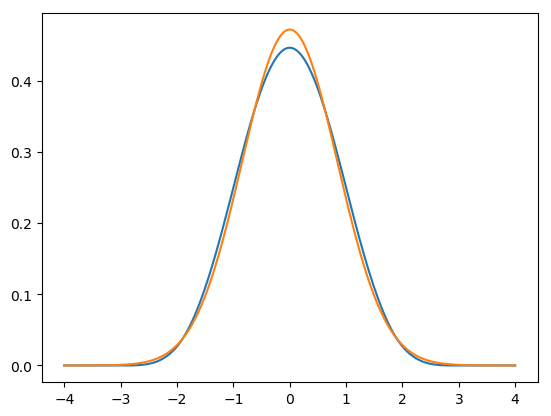

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13ca61710>

In [6]:
test_data = parse_test(a)
plot(test_data.x, test_data.fx)
plot(test_data.x, gauss(test_data.x, √(59/60-√(29)/20)))